<a href="https://colab.research.google.com/github/SHAIK-RAIYAN-2022-CSE/KARE/blob/main/3rd%20Year/NLPT/NLPT_EXP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of positive reviews: 8
Number of negative reviews: 0


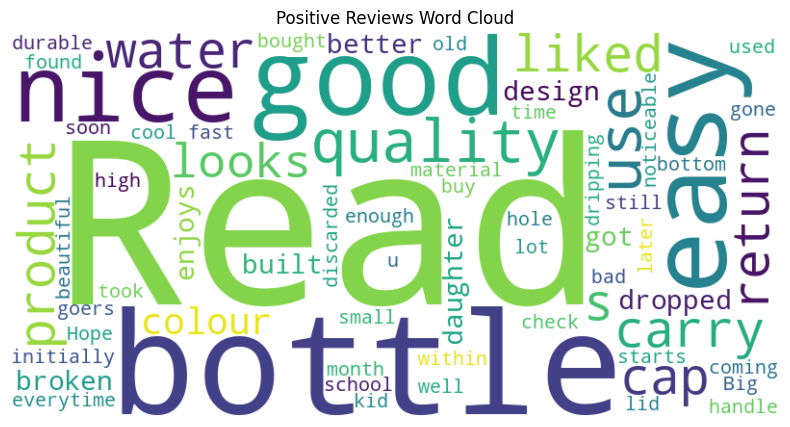

/bin/bash: -c: line 1: syntax error near unexpected token `negative_reviews,'
/bin/bash: -c: line 1: `generate_word_cloud(negative_reviews, 'Negative Reviews Word Cloud')'


In [16]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import time

def get_amazon_reviews(product_url, retries=3):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept-Encoding': 'gzip, deflate, br',
        'Connection': 'keep-alive',
        'DNT': '1',  # Do Not Track Request Header
        'Upgrade-Insecure-Requests': '1'
    }

    for attempt in range(retries):
        response = requests.get(product_url, headers=headers)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            reviews = soup.find_all('span', {'data-hook': 'review-body'})
            review_texts = [review.text.strip() for review in reviews]
            return review_texts
        else:
            print(f"Attempt {attempt + 1} failed with status code {response.status_code}. Retrying...")
            time.sleep(2)  # Wait for 2 seconds before retrying

    print("Failed to retrieve the page after several attempts.")
    return []

def analyze_sentiments(reviews):
    positive_reviews = []
    negative_reviews = []

    for review in reviews:
        analysis = TextBlob(review)
        if analysis.sentiment.polarity > 0:
            positive_reviews.append(review)
        else:
            negative_reviews.append(review)

    return positive_reviews, negative_reviews

def generate_word_cloud(reviews, title):
    text = ' '.join(reviews)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Example product URL
product_url = 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MTozNTA0OTc1OTQzMDE2MjAzOjE3MjE2NDY5OTk6c3BfYXRmOjMwMDExODAyNzE4MjMzMjo6MDo6&url=%2FSpeedex-Stainless-1000-ML-DUAL-PINK-BLUE%2Fdp%2FB0BFCSY51S%2Fref%3Dsr_1_4_sspa%3Fdib%3DeyJ2IjoiMSJ9.q_c37afpGSppqeVHb5BjP6uO1GKsFOGUNwASfUdTt5yMaVAj7d4WPopG7ZdObITKAC8Cao3WoDk6GJ5sThwrJ0JX6y2b6hGOfgVUOSQucIZGRTK9qxSf6gJWlRwI7wnHxbGwL9tQFaLVlasgJ37Dgs56tFhG4HZ1V0i6-q6dealGD13NydEvYLPHxjH0gCva5yC30EXlnlD8FbAiqGJyOYvOt704r9D8BnKS2hGtt0VTrbiIXnC2jAFiwiZafCBTT6RPR9kBGTYNApClr7FhGt6UQmVmYbwIeOJUJfFxxXI.eXLHTAnoGePFdttqy0nrPBuu7pIpMXZH8ZMFFcQpd9U%26dib_tag%3Dse%26keywords%3Dwater%2Bbottle%26qid%3D1721646999%26sr%3D8-4-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1'
reviews = get_amazon_reviews(product_url)
if reviews:
    positive_reviews, negative_reviews = analyze_sentiments(reviews)

    print(f"Number of positive reviews: {len(positive_reviews)}")
    print(f"Number of negative reviews: {len(negative_reviews)}")

    generate_word_cloud(positive_reviews, 'Positive Reviews Word Cloud')
    !generate_word_cloud(negative_reviews, 'Negative Reviews Word Cloud')
else:
    print("No reviews found or failed to retrieve reviews.")